In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv
/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# **First dataset:ipl-complete-dataset-20082020/IPL Matches 2008-2020**

In [3]:
data=pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv")
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
data.info()  #Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
data.drop(['method'],axis=1,inplace=True)

In [6]:
data.info()  #method column removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


In [7]:
temp=pd.DataFrame({"Winner":data['winner']})
count=temp.value_counts()
print(count)

Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


# **Most wins in IPL**

In [8]:
#Storing the teams name in list
label=[]
for i in count.keys():
    label.append(i[0])
print(label)


['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals', 'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers', 'Delhi Capitals', 'Gujarat Lions', 'Pune Warriors', 'Rising Pune Supergiant', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants']


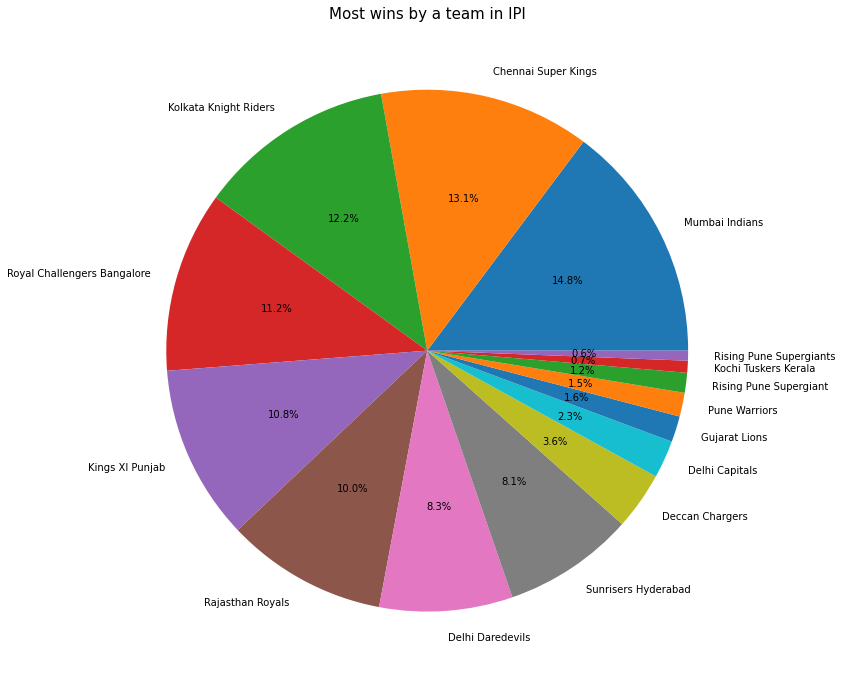

In [9]:
bar,ax=plt.subplots(figsize=(20,12))
ax=plt.pie(x=count,autopct="%.1f%%",labels=label)
plt.title("Most wins by a team in IPl",fontsize=15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


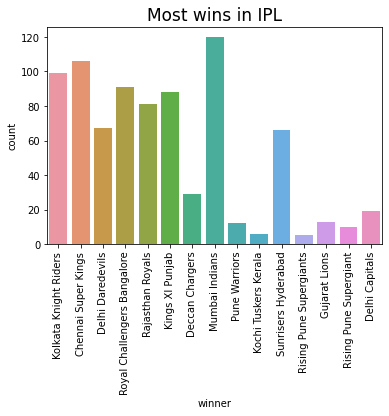

In [10]:
#Another way of represnting using countplot
sns.countplot(data['winner'],data=data)
plt.title("Most wins in IPL",fontsize=17)
plt.xticks(rotation=90)
plt.show()

# Most Wins in an Eliminator

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


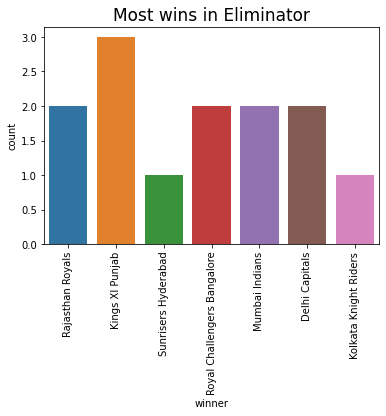

In [11]:
sns.countplot(data['winner'][data['eliminator']=='Y'],data=data)
plt.title("Most wins in Eliminator",fontsize=17)
plt.xticks(rotation=90)
plt.show()

# Toss Decision

In [12]:
#Just printing the structure of temp_bat
teams=data['toss_winner'].unique()
for id,element in enumerate(teams):
    temp_bat=data[(data['toss_winner']==element) & (data['toss_decision']=='bat')]
print(temp_bat)

          id       city        date player_of_match  \
700  1175360      Delhi  2019-03-26       SR Watson   
741  1178421      Delhi  2019-04-28        S Dhawan   
793  1216529  Abu Dhabi  2020-10-11       Q de Kock   
807  1216543      Dubai  2020-10-14        A Nortje   
810  1216546      Dubai  2020-10-20        S Dhawan   
814  1237180  Abu Dhabi  2020-11-08      MP Stoinis   
815  1237181      Dubai  2020-11-10        TA Boult   

                                   venue  neutral_venue           team1  \
700                     Feroz Shah Kotla              0  Delhi Capitals   
741                     Feroz Shah Kotla              0  Delhi Capitals   
793                 Sheikh Zayed Stadium              0  Delhi Capitals   
807  Dubai International Cricket Stadium              0  Delhi Capitals   
810  Dubai International Cricket Stadium              0  Delhi Capitals   
814                 Sheikh Zayed Stadium              0  Delhi Capitals   
815  Dubai International Cricket S

In [13]:
teams=data['toss_winner'].unique()
decision_making=pd.DataFrame([],columns=['Toss Winner','Decision','Times'])

for id,element in enumerate(teams):
    temp_bat=data[(data['toss_winner']==element) & (data['toss_decision']=='bat')]
    temp_field=data[(data['toss_winner']==element) & (data['toss_decision']=='field')]
    
    #append it to empty list;
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'bat','Times':temp_bat['toss_winner'].count()},ignore_index=True)
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'field','Times':temp_field['toss_winner'].count()},ignore_index=True)

print(decision_making)

                    Toss Winner Decision Times
0   Royal Challengers Bangalore      bat    24
1   Royal Challengers Bangalore    field    63
2           Chennai Super Kings      bat    51
3           Chennai Super Kings    field    46
4              Rajasthan Royals      bat    34
5              Rajasthan Royals    field    53
6                Mumbai Indians      bat    48
7                Mumbai Indians    field    58
8               Deccan Chargers      bat    24
9               Deccan Chargers    field    19
10              Kings XI Punjab      bat    27
11              Kings XI Punjab    field    58
12        Kolkata Knight Riders      bat    34
13        Kolkata Knight Riders    field    64
14             Delhi Daredevils      bat    29
15             Delhi Daredevils    field    51
16         Kochi Tuskers Kerala      bat     3
17         Kochi Tuskers Kerala    field     5
18                Pune Warriors      bat    11
19                Pune Warriors    field     9
20          S

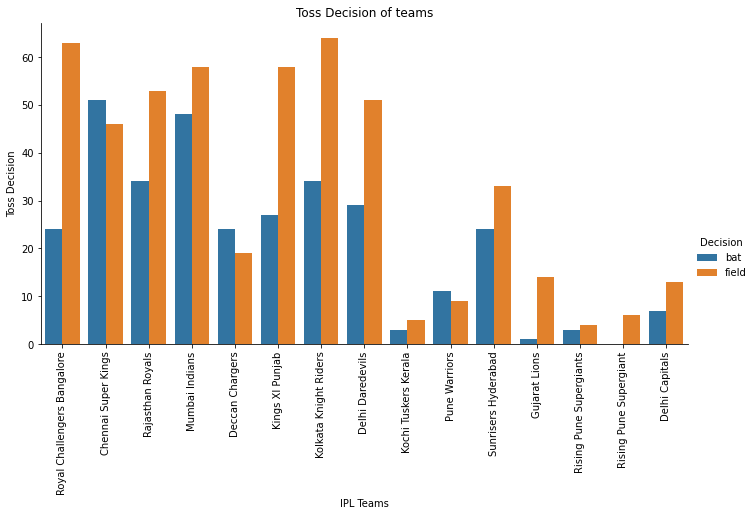

In [14]:
 sns.catplot(x="Toss Winner",y="Times",hue='Decision',data=decision_making,kind='bar',height=5,aspect=2)
 plt.xticks(rotation=90)
plt.title('Toss Decision of teams')
plt.xlabel('IPL Teams')
plt.ylabel('Toss Decision')
plt.show()

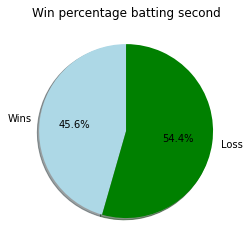

In [15]:
num_of_wins = (data.result=='runs').sum()
num_of_loss = (data.result=='wickets').sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['lightblue', 'green']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

# Famous Venue

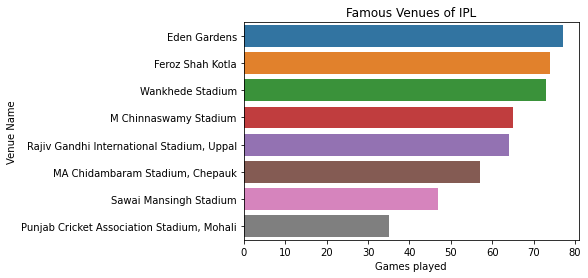

In [16]:
sns.barplot(x=data['venue'].value_counts().head(8).values,y=data['venue'].value_counts().head(8).index,data=data)
plt.title("Famous Venues of IPL")
plt.xlabel("Games played")
plt.ylabel("Venue Name")
plt.show()

**Top 5 Umpires**

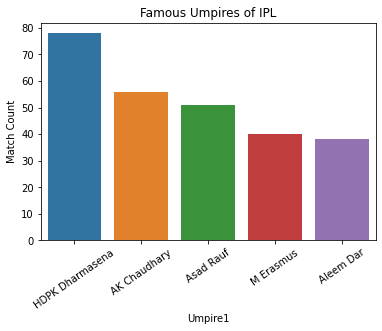

In [17]:
sns.barplot(x=data['umpire1'].value_counts().head().index,y=data['umpire1'].value_counts().head().values,data=data)
plt.title("Famous Umpires of IPL")
plt.xticks(rotation=35)
plt.xlabel("Umpire1")
plt.ylabel("Match Count")
plt.show()

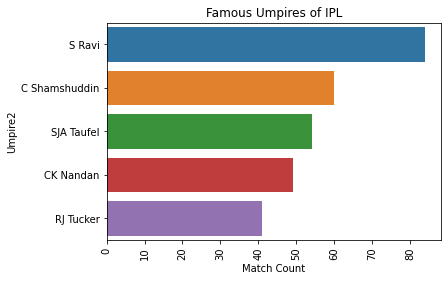

In [18]:
sns.barplot(x=data['umpire2'].value_counts().head().values,y=data['umpire2'].value_counts().head().index,data=data)
plt.title("Famous Umpires of IPL")
plt.xticks(rotation=90)
plt.xlabel("Match Count")
plt.ylabel("Umpire2")
plt.show()

**Most MoM Awards**

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64


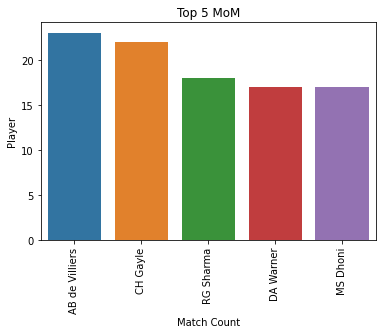

In [19]:
temp_data=data['player_of_match'].value_counts().head()
print(temp_data)
#sns.barplot(x=data['player_of_match'].value_counts().head().index,y=data['player_of_match'].value_counts().head().values,data=data)
sns.barplot(x=temp_data.index,y=temp_data.values,data=data)

plt.title("Top 5 MoM")
plt.xticks(rotation=90)
plt.xlabel("Match Count")
plt.ylabel("Player")
plt.show()

**Team winning the toss as well as match**

In [20]:
# count=0
# for index,row in data.iterrows():
#     if(row["toss_winner"]== row["winner"]):
#         count=count+1
# print("Team winning the toss as well as match: ")
# print(count)

percent = data['toss_winner'] == data['winner']

percent.groupby(percent).size()
round(percent.groupby(percent).size() / percent.count() * 100,2)

False    48.77
True     51.23
dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

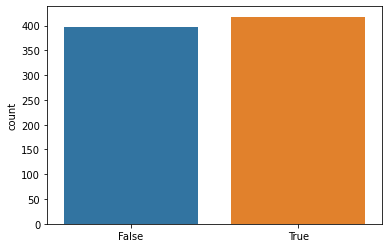

In [21]:
sns.countplot(percent)

Thus winning the toss doesn't have any significant impact on winning the game

# **Second Dataset:IPL Ball-by-Ball 2008-2020**

In [22]:
dataset=pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv")
dataset.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

**Total IPL capped players till 2020**

In [24]:
total_player=dataset['batsman'].unique()
len(total_player)

537

# Batting Analysis

**Top 10 run-scorer**

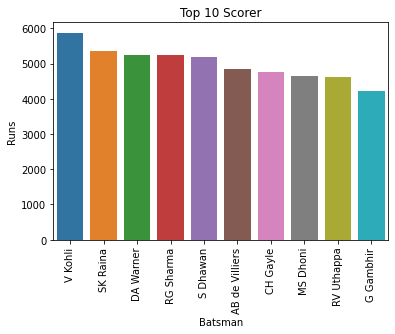

In [25]:
#sns.barplot(x=data['player_of_match'].value_counts().head().index,y=data['player_of_match'].value_counts().head().values,data=data)
temp_df = dataset.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).head(10).reset_index(drop=True)
sns.barplot(x=temp_df['batsman'],y=temp_df['batsman_runs'],data=temp_df)

plt.title("Top 10 Scorer")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.show()

**Most number of boundaries**

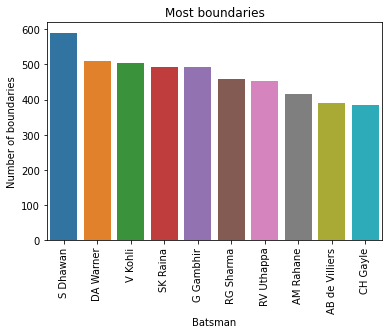

In [26]:
temp_df = dataset.groupby('batsman')['batsman_runs'].agg(lambda x:(x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).head(10).reset_index(drop=True)
temp_df
sns.barplot(x=temp_df['batsman'],y=temp_df['batsman_runs'],data=temp_df)

plt.title("Most boundaries")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Number of boundaries")
plt.show()

**Most number of 6's**

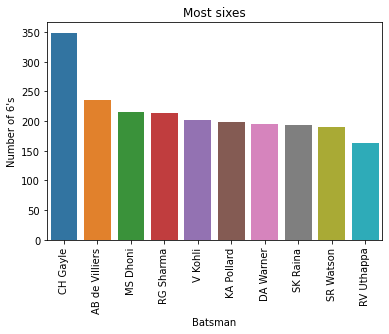

In [27]:
temp_df = dataset.groupby('batsman')['batsman_runs'].agg(lambda x:(x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).head(10).reset_index(drop=True)
temp_df
sns.barplot(x=temp_df['batsman'],y=temp_df['batsman_runs'],data=temp_df)

plt.title("Most sixes")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Number of 6's")
plt.show()

**Most number of dots**

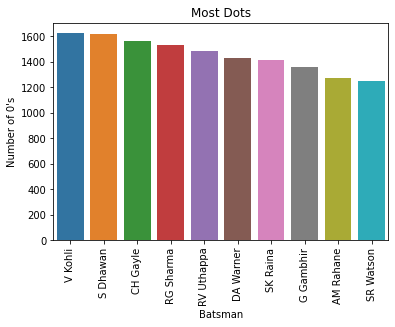

In [28]:
temp_df = dataset.groupby('batsman')['batsman_runs'].agg(lambda x:(x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).head(10).reset_index(drop=True)
temp_df
sns.barplot(x=temp_df['batsman'],y=temp_df['batsman_runs'],data=temp_df)

plt.title("Most Dots")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Number of 0's")
plt.show()

# Bowling Analysis

**Most bowls bowed by a bowler**

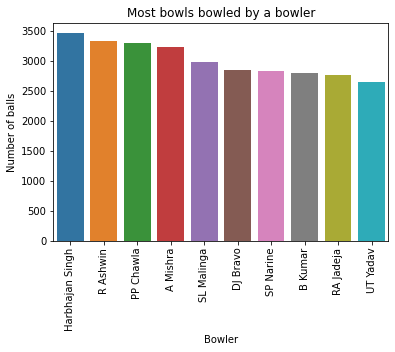

In [29]:
temp_df = dataset.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True).head(10)
sns.barplot(x=temp_df['bowler'],y=temp_df['ball'],data=temp_df)

plt.title("Most bowls bowled by a bowler")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Number of balls")
plt.show()

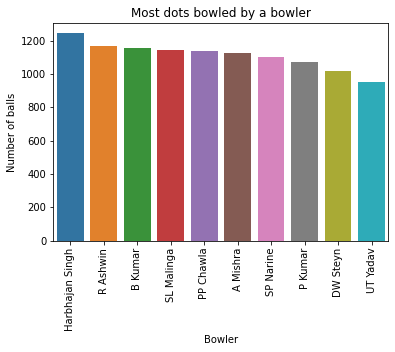

In [30]:
temp_df = dataset.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True).head(10)
sns.barplot(x=temp_df['bowler'],y=temp_df['total_runs'],data=temp_df)

plt.title("Most dots bowled by a bowler")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Number of balls")
plt.show()

**Most extra runs by a bowler**

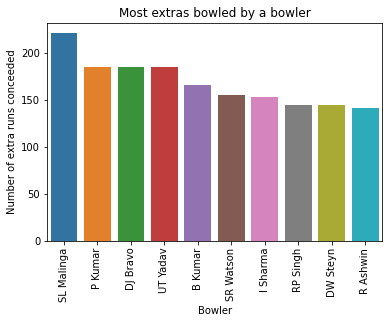

In [31]:
temp_df = dataset.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True).head(10)
sns.barplot(x=temp_df['bowler'],y=temp_df['extra_runs'],data=temp_df)

plt.title("Most extras bowled by a bowler")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Number of extra runs conceeded")
plt.show()

**Most wicket-taker**

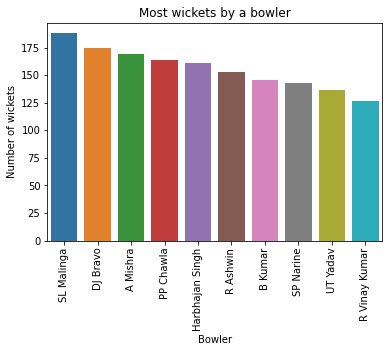

In [32]:
temp_df = dataset.groupby('bowler')['is_wicket'].agg('sum').reset_index().sort_values(by='is_wicket', ascending=False).reset_index(drop=True).head(10)
sns.barplot(x=temp_df['bowler'],y=temp_df['is_wicket'],data=temp_df)

plt.title("Most wickets by a bowler")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Number of wickets")
plt.show()